In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/hotel_review_train.csv')
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [3]:
df['Is_Response'].unique()

array(['not happy', 'happy'], dtype=object)

In [4]:
df['Is_Response'].value_counts()   # data is some what imbalanced 

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [5]:
df['Is_Response'].value_counts(normalize =True)*100   #calculating percentage

happy        68.12134
not happy    31.87866
Name: Is_Response, dtype: float64

<AxesSubplot:>

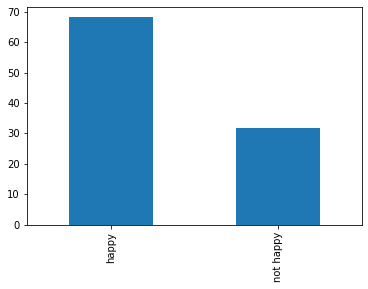

In [6]:
(df['Is_Response'].value_counts(normalize =True)*100).plot(kind='bar')

In [7]:
df.info()   # all columns are of object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [8]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [9]:
df.isnull().sum()   # there are no NaN values 

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [10]:
df.drop(columns=['User_ID','Browser_Used','Device_Used'], inplace =True)

In [11]:
df

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [12]:
import re
import string

# . means any character
# \ Signals a special sequence (can also be used to escape special characters)
# ? Zero or one occurrences

def text_clean(text):
    text = text.lower() # convert into lower case
    text = re.sub('\[.*?\]','',text)  # remove square brackets
    text = re.sub( '[%s]' % re.escape(string.punctuation),'',text) # remove punctuations ()
    text = re.sub('\w*\d\w*','',text)  # removes digits
    text = re.sub('\n','',text)    # remove next line char
    text = re.sub('[''“”…]','',text) # remove  inverted commas
    return text

clean = lambda x:text_clean(x)

In [13]:
df['cleaned_Description'] = pd.DataFrame(df.Description.apply(clean))

In [14]:
df

,Description,Is_Response,cleaned_Description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,we arrived late at night and walked in to a ch...
38928,The only positive impression is location and p...,not happy,the only positive impression is location and p...
38929,Traveling with friends for shopping and a show...,not happy,traveling with friends for shopping and a show...
38930,The experience was just ok. We paid extra for ...,not happy,the experience was just ok we paid extra for a...


In [15]:
# saving the dataframe to check values
#df.to_csv('file_check.csv')

In [16]:
# import nltk
# nltk.download('punkt')

### tokenization

In [17]:
import nltk

def tokenize(text):
    nltk_tokens = nltk.word_tokenize(text)
    return nltk_tokens

#applying function to the column
df['tokenized']= df['cleaned_Description'].apply(lambda x: tokenize(x))

![image.png](attachment:image.png )
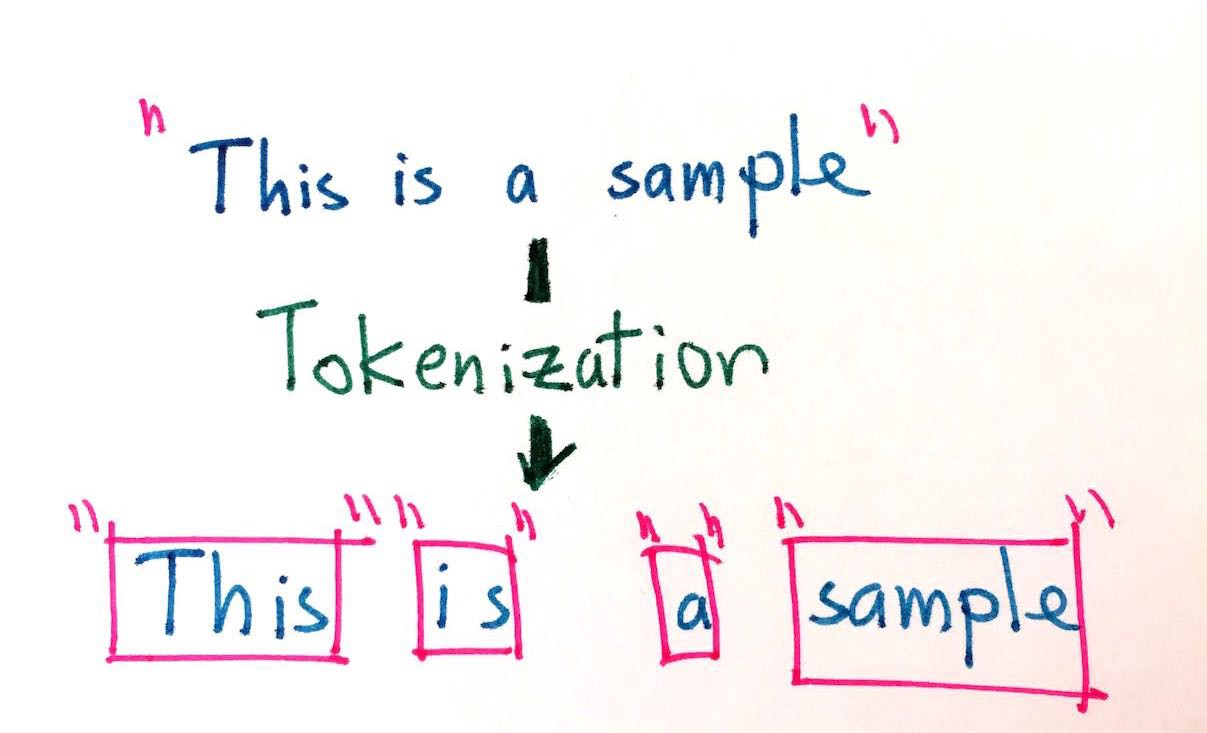

In [18]:
df


,Description,Is_Response,cleaned_Description,tokenized
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,"[the, room, was, kind, of, clean, but, had, a,..."
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,"[i, stayed, at, the, crown, plaza, april, apri..."
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,"[i, booked, this, hotel, through, hotwire, at,..."
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,"[stayed, here, with, husband, and, sons, on, t..."
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,"[my, girlfriends, and, i, stayed, here, to, ce..."
...,...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,we arrived late at night and walked in to a ch...,"[we, arrived, late, at, night, and, walked, in..."
38928,The only positive impression is location and p...,not happy,the only positive impression is location and p...,"[the, only, positive, impression, is, location..."
38929,Traveling with friends for shopping and a show...,not happy,traveling with friends for shopping and a show...,"[traveling, with, friends, for, shopping, and,..."
38930,The experience was just ok. We paid extra for ...,not happy,the experience was just ok we paid extra for a...,"[the, experience, was, just, ok, we, paid, ext..."


In [19]:
#stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

#### applying stop words

In [20]:
#nltk.download('stopwords')

In [21]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df['no_stopwords']= df['tokenized'].apply(lambda x:remove_stopwords(x))

In [23]:
df


,Description,Is_Response,cleaned_Description,tokenized,no_stopwords
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,"[the, room, was, kind, of, clean, but, had, a,...","[room, kind, clean, strong, smell, dogs, gener..."
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,"[i, stayed, at, the, crown, plaza, april, apri...","[stayed, crown, plaza, april, april, staff, fr..."
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,"[i, booked, this, hotel, through, hotwire, at,...","[booked, hotel, hotwire, lowest, price, could,..."
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,"[stayed, here, with, husband, and, sons, on, t...","[stayed, husband, sons, way, alaska, cruise, l..."
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,"[my, girlfriends, and, i, stayed, here, to, ce...","[girlfriends, stayed, celebrate, th, birthdays..."
...,...,...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,we arrived late at night and walked in to a ch...,"[we, arrived, late, at, night, and, walked, in...","[arrived, late, night, walked, checkin, area, ..."
38928,The only positive impression is location and p...,not happy,the only positive impression is location and p...,"[the, only, positive, impression, is, location...","[positive, impression, location, public, parki..."
38929,Traveling with friends for shopping and a show...,not happy,traveling with friends for shopping and a show...,"[traveling, with, friends, for, shopping, and,...","[traveling, friends, shopping, show, location,..."
38930,The experience was just ok. We paid extra for ...,not happy,the experience was just ok we paid extra for a...,"[the, experience, was, just, ok, we, paid, ext...","[experience, ok, paid, extra, view, pool, got,..."


#### Lematisation

In [24]:
# Lemmatization is a text normalization technique used in Natural Language Processing (NLP),
# that switches any kind of a word to its base root mode.
# Example: lemmatizing the word 'Caring' would return 'Care' 

In [25]:
 #nltk.download('wordnet')

In [26]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [27]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['lemmatized']=df['no_stopwords'].apply(lambda x:lemmatizer(x))

In [28]:
df

,Description,Is_Response,cleaned_Description,tokenized,no_stopwords,lemmatized
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,"[the, room, was, kind, of, clean, but, had, a,...","[room, kind, clean, strong, smell, dogs, gener...","[room, kind, clean, strong, smell, dog, genera..."
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,"[i, stayed, at, the, crown, plaza, april, apri...","[stayed, crown, plaza, april, april, staff, fr...","[stayed, crown, plaza, april, april, staff, fr..."
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,"[i, booked, this, hotel, through, hotwire, at,...","[booked, hotel, hotwire, lowest, price, could,...","[booked, hotel, hotwire, lowest, price, could,..."
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,"[stayed, here, with, husband, and, sons, on, t...","[stayed, husband, sons, way, alaska, cruise, l...","[stayed, husband, son, way, alaska, cruise, lo..."
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,"[my, girlfriends, and, i, stayed, here, to, ce...","[girlfriends, stayed, celebrate, th, birthdays...","[girlfriend, stayed, celebrate, th, birthday, ..."
...,...,...,...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,we arrived late at night and walked in to a ch...,"[we, arrived, late, at, night, and, walked, in...","[arrived, late, night, walked, checkin, area, ...","[arrived, late, night, walked, checkin, area, ..."
38928,The only positive impression is location and p...,not happy,the only positive impression is location and p...,"[the, only, positive, impression, is, location...","[positive, impression, location, public, parki...","[positive, impression, location, public, parki..."
38929,Traveling with friends for shopping and a show...,not happy,traveling with friends for shopping and a show...,"[traveling, with, friends, for, shopping, and,...","[traveling, friends, shopping, show, location,...","[traveling, friend, shopping, show, location, ..."
38930,The experience was just ok. We paid extra for ...,not happy,the experience was just ok we paid extra for a...,"[the, experience, was, just, ok, we, paid, ext...","[experience, ok, paid, extra, view, pool, got,...","[experience, ok, paid, extra, view, pool, got,..."


In [29]:
def join_list(text):
    joined_txt =' '.join(text)
    return joined_txt

df['lemmatized_string']=df['lemmatized'].apply(lambda x:join_list(x))    
    

In [30]:
df

,Description,Is_Response,cleaned_Description,tokenized,no_stopwords,lemmatized,lemmatized_string
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,"[the, room, was, kind, of, clean, but, had, a,...","[room, kind, clean, strong, smell, dogs, gener...","[room, kind, clean, strong, smell, dog, genera...",room kind clean strong smell dog generally ave...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,"[i, stayed, at, the, crown, plaza, april, apri...","[stayed, crown, plaza, april, april, staff, fr...","[stayed, crown, plaza, april, april, staff, fr...",stayed crown plaza april april staff friendly ...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,"[i, booked, this, hotel, through, hotwire, at,...","[booked, hotel, hotwire, lowest, price, could,...","[booked, hotel, hotwire, lowest, price, could,...",booked hotel hotwire lowest price could find g...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,"[stayed, here, with, husband, and, sons, on, t...","[stayed, husband, sons, way, alaska, cruise, l...","[stayed, husband, son, way, alaska, cruise, lo...",stayed husband son way alaska cruise loved hot...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,"[my, girlfriends, and, i, stayed, here, to, ce...","[girlfriends, stayed, celebrate, th, birthdays...","[girlfriend, stayed, celebrate, th, birthday, ...",girlfriend stayed celebrate th birthday planne...
...,...,...,...,...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,we arrived late at night and walked in to a ch...,"[we, arrived, late, at, night, and, walked, in...","[arrived, late, night, walked, checkin, area, ...","[arrived, late, night, walked, checkin, area, ...",arrived late night walked checkin area complet...
38928,The only positive impression is location and p...,not happy,the only positive impression is location and p...,"[the, only, positive, impression, is, location...","[positive, impression, location, public, parki...","[positive, impression, location, public, parki...",positive impression location public parking op...
38929,Traveling with friends for shopping and a show...,not happy,traveling with friends for shopping and a show...,"[traveling, with, friends, for, shopping, and,...","[traveling, friends, shopping, show, location,...","[traveling, friend, shopping, show, location, ...",traveling friend shopping show location great ...
38930,The experience was just ok. We paid extra for ...,not happy,the experience was just ok we paid extra for a...,"[the, experience, was, just, ok, we, paid, ext...","[experience, ok, paid, extra, view, pool, got,...","[experience, ok, paid, extra, view, pool, got,...",experience ok paid extra view pool got view pa...


In [31]:
X = df['lemmatized_string']
X

0        room kind clean strong smell dog generally ave...
1        stayed crown plaza april april staff friendly ...
2        booked hotel hotwire lowest price could find g...
3        stayed husband son way alaska cruise loved hot...
4        girlfriend stayed celebrate th birthday planne...
                               ...                        
38927    arrived late night walked checkin area complet...
38928    positive impression location public parking op...
38929    traveling friend shopping show location great ...
38930    experience ok paid extra view pool got view pa...
38931    westin wonderfully restored grande dame hotel ...
Name: lemmatized_string, Length: 38932, dtype: object

In [32]:
y = df['Is_Response']
y

0        not happy
1        not happy
2        not happy
3            happy
4        not happy
           ...    
38927        happy
38928    not happy
38929    not happy
38930    not happy
38931        happy
Name: Is_Response, Length: 38932, dtype: object

In [33]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.33)

In [34]:
X_train.shape, y_train.shape

((26084,), (26084,))

In [35]:
X_test.shape , y_test.shape

((12848,), (12848,))

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [37]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [38]:
classifier = LogisticRegression()

classifier.fit(tfidf_train_vectors,y_train)

LogisticRegression()

In [39]:
y_pred = classifier.predict(tfidf_test_vectors)

In [40]:
y_pred

array(['happy', 'not happy', 'happy', ..., 'happy', 'happy', 'not happy'],
      dtype=object)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       happy       0.89      0.94      0.92      8752
   not happy       0.86      0.76      0.81      4096

    accuracy                           0.88     12848
   macro avg       0.88      0.85      0.86     12848
weighted avg       0.88      0.88      0.88     12848



In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[8266  486]
 [1003 3093]]


In [43]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(tfidf_train_vectors,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8797347460536556


In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(tfidf_train_vectors, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.879722 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.856387 (0.005287) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856119 (0.005201) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856374 (0.005261) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.873230 (0.005024) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873268 (0.004929) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.873256 (0.004984) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.879722 (0.004859) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.879722 (0.004859) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.879722 (0.004832) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.845499 (0.004977) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.845499 (0.004993) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.845665 (0.005068) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.682193 (0.000619) wit

In [50]:
def predict(text):
    
    # text Clean
    text = text.lower() # convert into lower case
    text = re.sub('\[.*?\]','',text)  # remove square brackets
    text = re.sub( '[%s]' % re.escape(string.punctuation),'',text) # remove punctuations ()
    text = re.sub('\w*\d\w*','',text)  # removes digits
    text = re.sub('\n','',text)    # remove next line char
    text = re.sub('[''“”…]','',text) # remove  inverted commas
    
    nltk_tokens = nltk.word_tokenize(text)  # tokenization
    print('tokenize: ',nltk_tokens)
    
    stopwords = nltk.corpus.stopwords.words('english') #Stop words present in the library
    no_stopwords= [i for i in nltk_tokens if i not in stopwords]   # removing stop words
    print('no_stopwords:',no_stopwords)
    
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in no_stopwords]
    print('lemm_text:',lemm_text)
    
    joined_lemm_txt =' '.join(lemm_text)
    print('joined_lemm_txt:',joined_lemm_txt)
    
    
    
    tvect = tfidf_vectorizer.transform([joined_lemm_txt])
    result = classifier.predict(tvect)
    return result


predict('this college is very good')


tokenize:  ['this', 'college', 'is', 'very', 'good']
no_stopwords: ['college', 'good']
lemm_text: ['college', 'good']
joined_lemm_txt: college good


array(['happy'], dtype=object)

In [51]:
def predict(text):
    
    # text Clean
    text = text.lower() # convert into lower case
    text = re.sub('\[.*?\]','',text)  # remove square brackets
    text = re.sub( '[%s]' % re.escape(string.punctuation),'',text) # remove punctuations ()
    text = re.sub('\w*\d\w*','',text)  # removes digits
    text = re.sub('\n','',text)    # remove next line char
    text = re.sub('[''“”…]','',text) # remove  inverted commas
    
    nltk_tokens = nltk.word_tokenize(text)  # tokenization
    
    stopwords = nltk.corpus.stopwords.words('english') #Stop words present in the library
    no_stopwords= [i for i in nltk_tokens if i not in stopwords]   # removing stop words
  
    
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in no_stopwords]
    
    joined_lemm_txt =' '.join(lemm_text)
    
    tvect = tfidf_vectorizer.transform([joined_lemm_txt])
    result = classifier.predict(tvect)
    return result


predict('this college is very good')


array(['happy'], dtype=object)